In [13]:
# notebook: 03_model_training (or add cells in current notebook)
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score, RocCurveDisplay


import joblib
np.random.seed(42)


In [3]:
print("Notebook ready for data cleaning ")

Notebook ready for data cleaning 


In [4]:
df = pd.read_csv("../data/customer_churn.csv")


In [5]:
df.head()


,CustomerID,Name,Age,Gender,Tenure,Service,MonthlyCharges,TotalCharges,Churn
0,1,Ali,25.0,Male,12.0,Internet,29.85,298.5,No
1,2,Sara,NaN,Female,24.0,Phone,56.95,NaN,Yes
2,3,Hassan,45.0,Male,NaN,Internet,53.85,1080.5,No
3,4,Mehak,33.0,Female,5.0,Internet,NaN,NaN,Yes
4,5,Omar,60.0,Male,72.0,Phone,99.65,7000.0,No


In [6]:
print("Shape:", df.shape)   # (rows, columns)
print("\nColumns:", df.columns.tolist())


Shape: (6, 9)

Columns: ['CustomerID', 'Name', 'Age', 'Gender', 'Tenure', 'Service', 'MonthlyCharges', 'TotalCharges', 'Churn']


In [7]:
df.info()
print("\nMissing values:\n", df.isnull().sum())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   CustomerID      6 non-null      int64  
 1   Name            6 non-null      object 
 2   Age             5 non-null      float64
 3   Gender          6 non-null      object 
 4   Tenure          5 non-null      float64
 5   Service         6 non-null      object 
 6   MonthlyCharges  5 non-null      float64
 7   TotalCharges    4 non-null      float64
 8   Churn           6 non-null      object 
dtypes: float64(4), int64(1), object(4)
memory usage: 564.0+ bytes

Missing values:
 CustomerID        0
Name              0
Age               1
Gender            0
Tenure            1
Service           0
MonthlyCharges    1
TotalCharges      2
Churn             0
dtype: int64


In [9]:
!pip install seaborn



[notice] A new release of pip is available: 24.2 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


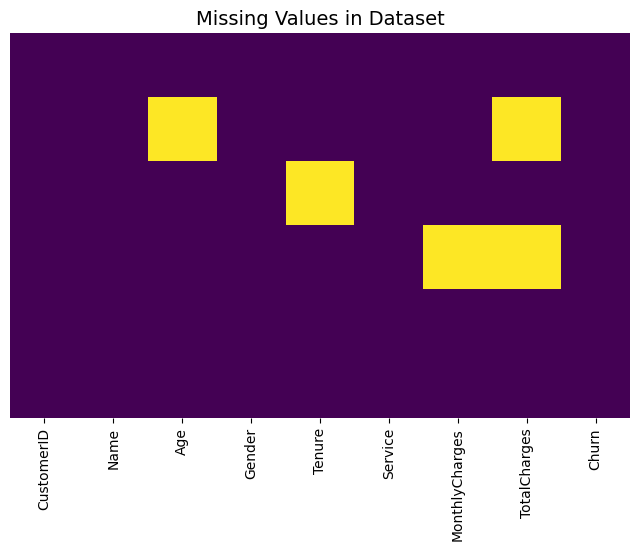

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot heatmap of missing values
plt.figure(figsize=(8, 5))
sns.heatmap(df.isnull(), cmap="viridis", cbar=False, yticklabels=False)
plt.title("Missing Values in Dataset", fontsize=14)
plt.show()


In [ ]:
df['Age'] = df['Age'].fillna(df['Age'].median())
df['Tenure'] = df['Tenure'].fillna(df['Tenure'].median())
df['MonthlyCharges'] = df['MonthlyCharges'].fillna(df['MonthlyCharges'].median())
df['TotalCharges'] = df['TotalCharges'].fillna(df['TotalCharges'].median())

